In [56]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier

In [57]:
if os.path.exists("bitcoin_trades.csv"):
    bitcoinData = pd.read_csv("bitcoin_trades.csv", index_col=0)
    bitcoinData.index = pd.to_datetime(bitcoinData.index, unit='s')

# bitcoinData = bitcoinData.dropna()

In [58]:
# bitcoinData.plot.line(y="Close", use_index=True)

In [59]:
bitcoinData["next_minute"] = bitcoinData["Close"].shift(-1)
bitcoinData["target"] = (bitcoinData["next_minute"] > bitcoinData["Close"]).astype(int)

In [60]:
bitcoin2020 = bitcoinData.loc["2020-01-01":"2020-12-31"]
bitcoinData = bitcoinData.loc["2021-01-01":]
bitcoinData = bitcoinData.fillna(method="ffill")
bitcoin2020 = bitcoin2020.fillna(method="ffill")

In [61]:
horizons = [5,30,90,120]
new_predictors = []

for horizon in horizons:
    rolling_avg = bitcoinData.rolling(horizon).mean().fillna(method="ffill")
    # print(rolling_avg)
    
    ratio_column = f"Close_Ratio_{horizon}"
    bitcoinData[ratio_column] = bitcoinData["Close"] / rolling_avg["Close"]
    
    trend_column = f"Trend_{horizon}"
    bitcoinData[trend_column] = bitcoinData.shift(1).rolling(horizon).sum()["target"]
    
    new_predictors+= [ratio_column, trend_column]
    

In [62]:
bitcoinData = bitcoinData.iloc[120:]
bitcoinData

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,next_minute,target,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_90,Trend_90,Close_Ratio_120,Trend_120
Timestamp,,,,,,,,,,,,,,,,,
2021-01-01 02:00:00,29484.39,29535.95,29484.39,29518.58,14.232027,420039.533740,29513.682449,29527.72,1,1.001281,3.0,1.002408,17.0,1.009196,51.0,1.011994,64.0
2021-01-01 02:01:00,29526.11,29530.41,29506.27,29527.72,14.658453,432733.302960,29521.075132,29464.99,0,1.000934,4.0,1.002575,18.0,1.009280,52.0,1.012179,64.0
2021-01-01 02:02:00,29526.21,29527.03,29464.54,29464.99,8.033546,237094.194690,29513.020155,29456.74,0,0.999034,3.0,1.000412,17.0,1.006938,51.0,1.009905,64.0
2021-01-01 02:03:00,29464.99,29474.24,29433.10,29456.74,6.981526,205641.452150,29455.087712,29454.80,0,0.998891,3.0,1.000085,17.0,1.006472,50.0,1.009504,63.0
2021-01-01 02:04:00,29461.05,29465.69,29444.49,29454.80,3.924225,115610.085300,29460.618045,29439.16,0,0.998990,2.0,0.999997,16.0,1.006214,50.0,1.009320,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,58685.81,0,0.999630,1.0,1.000154,12.0,0.999865,40.0,0.999263,54.0
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,58723.84,1,0.999675,1.0,1.000176,11.0,0.999891,40.0,0.999270,54.0
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,58760.59,1,1.000236,2.0,1.000823,12.0,1.000560,41.0,0.999923,54.0


In [63]:
# model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# train = []

# train = bitcoinData.iloc[:-100]
# test = bitcoinData.iloc[-100:]
    
# test = bitcoinData.iloc[-100:]

# predictors = ["Close", "Volume_(BTC)", "Open", "High", "Low"]
# model.fit(train[predictors], train["target"])

In [64]:
# import pickle


# filename = 'first_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [65]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.6382978723404256

<Axes: xlabel='Timestamp'>

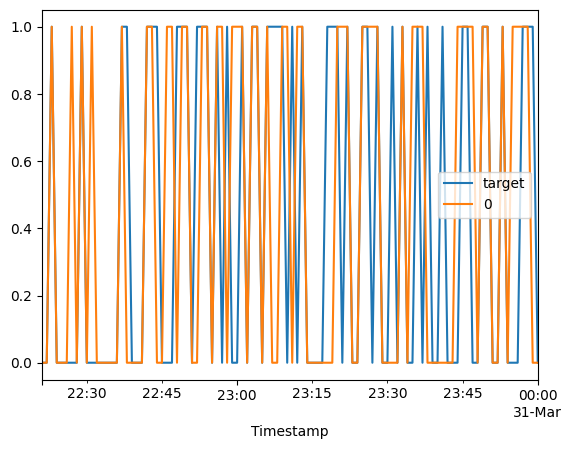

In [66]:
combined = pd.concat([test["target"], preds], axis=1)
combined.plot()

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [68]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    
    return pd.concat(all_predictions)

In [71]:
model_load = pickle.load(open(filename, 'rb'))
predictions = backtest(bitcoin2020, model_load, predictors)


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestClassifier.